Linear regression with tensorflow

1000 randomly generated data

learning rate : 0.3

train : 6 times

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


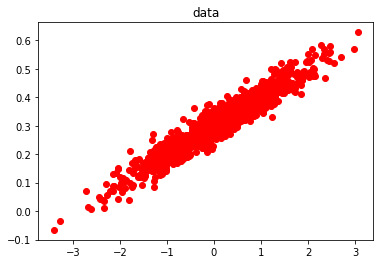

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>


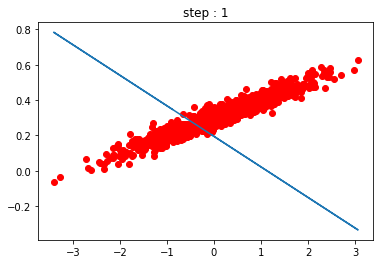

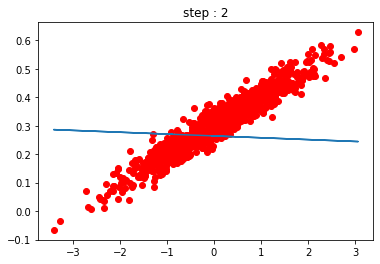

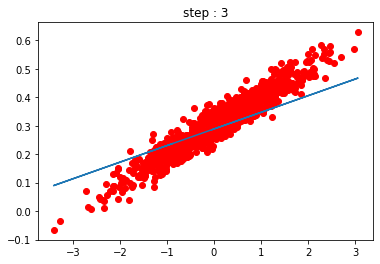

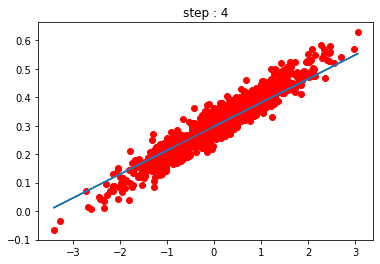

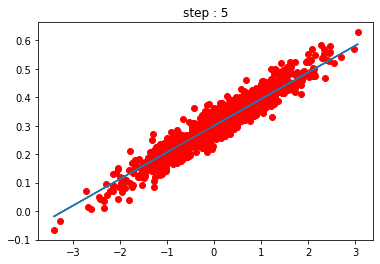

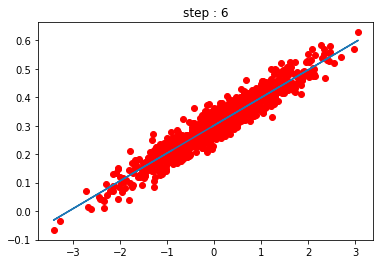

W :  [-0.17280644178390503, -0.006481509655714035, 0.058406271040439606, 0.08377395570278168, 0.09371307492256165, 0.09761606156826019]
b :  [0.19496028125286102, 0.2643716335296631, 0.28879842162132263, 0.29726698994636536, 0.30014535784721375, 0.30109724402427673]
loss :  [0.08890977, 0.013959998, 0.0028599924, 0.0012070857, 0.00095941377, 0.0009220418]


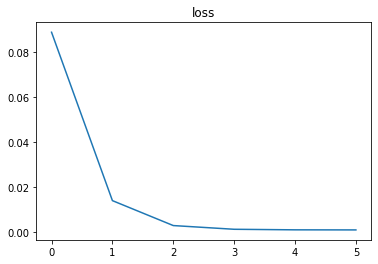

In [2]:
import tensorflow as tf
import numpy as np
import random as random
import matplotlib.pyplot as plt

num_points = 1000
x = []
y = []

for i in range(num_points):
    temp_x = np.random.normal(0.0, 1)
    # noise
    temp_y = 0.1 * temp_x + 0.3 + np.random.normal(0.0, 0.03)
    x.append(temp_x)
    y.append(temp_y)

# check data
plt.plot(x, y, 'ro')
plt.title('data')
plt.show()

# parameters to optimize
W = tf.Variable([-0.6])
b = tf.Variable(tf.zeros([1]))
print(W, b)

# make loss function : MSE(mean square error)
y_pred = tf.add(tf.multiply(x, W), b)
loss = tf.reduce_mean(tf.square(y - y_pred))

# set optimizer with learning rate(0.3)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

# make session
sess = tf.Session()
sess.run(init)

W_list = []
b_list = []
loss_list = []

# training
for step in range(6):
  sess.run(train)

  # check data and model
  plt.plot(x, y, 'ro')
  plt.plot(x, sess.run(W) * x + sess.run(b))
  plt.title('step : ' + str(step + 1))
  plt.show()

  # store W, b, loss data
  W_list.append(sess.run(W).item())
  b_list.append(sess.run(b).item())
  loss_list.append(sess.run(loss))

print("W : ", W_list)
print("b : ", b_list)
print("loss : ", loss_list)
plt.plot(loss_list)
plt.title('loss')
plt.show()